# Google collab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Генерация датасета

In [24]:
!mkdir -p dataset
!unzip /content/drive/MyDrive/dataset.zip -d dataset

Archive:  /content/drive/MyDrive/dataset.zip
  inflating: dataset/1 (1).jpg       
  inflating: dataset/1 (1).txt       
  inflating: dataset/1 (10).jpg      
  inflating: dataset/1 (10).txt      
  inflating: dataset/1 (11).jpg      
  inflating: dataset/1 (11).txt      
  inflating: dataset/1 (12).jpg      
  inflating: dataset/1 (12).txt      
  inflating: dataset/1 (13).jpg      
  inflating: dataset/1 (13).txt      
 extracting: dataset/1 (2).jpg       
  inflating: dataset/1 (2).txt       
  inflating: dataset/1 (3).jpg       
  inflating: dataset/1 (3).txt       
  inflating: dataset/1 (4).jpg       
  inflating: dataset/1 (4).txt       
  inflating: dataset/1 (5).jpg       
  inflating: dataset/1 (5).txt       
  inflating: dataset/1 (6).jpg       
  inflating: dataset/1 (6).txt       
  inflating: dataset/1 (7).jpg       
  inflating: dataset/1 (7).txt       
  inflating: dataset/1 (8).jpg       
  inflating: dataset/1 (8).txt       
  inflating: dataset/1 (9).jpg       
  inf

In [31]:
import glob
import os
import random
from tqdm import tqdm
import shutil
import cv2

In [25]:
path_to_dataset = 'dataset'

In [26]:
#!rm -rf train/ val/
for path in ['train', 'val']:
    os.makedirs(os.path.join('images', path), exist_ok=True)
    os.makedirs(os.path.join('labels', path), exist_ok=True)

In [27]:
val_prob = 0.1
for jpg in tqdm(glob.glob(os.path.join(path_to_dataset, '*.jpg'))):
    folder = 'train' if random.random() > val_prob else 'val'
    shutil.copyfile(jpg, os.path.join('images', folder, os.path.basename(jpg)))
for jpg in tqdm(glob.glob(os.path.join(path_to_dataset, '*.txt'))):
    folder = 'train' if random.random() > val_prob else 'val'
    shutil.copyfile(jpg, os.path.join('labels', folder, os.path.basename(jpg)))

100%|██████████| 1163/1163 [00:00<00:00, 6297.40it/s]


In [16]:
!cat ./svarka.yaml

path: ./ # dataset root dir
train: images/train # train images (relative to 'path') 4 images
val: images/val # val images (relative to 'path') 4 images
test: # test images (optional)

# Classes
names:
  1: adj
  2: int
  3: geo
  4: pro
  5: non


# Обучение

In [18]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 10.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [36]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

In [22]:
results = model.train(data='svarka.yaml', epochs=3)

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=svarka.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/labels/train... 226 images, 49 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:01<00:00, 221.47it/s]


train: New cache created: /content/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/labels/val... 7 images, 35 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<00:00, 292.91it/s]

val: New cache created: /content/labels/val.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G       2.73      5.155       1.91         38        640: 100%|██████████| 16/16 [04:48<00:00, 18.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.09s/it]

                   all         41         27   7.26e-05     0.0278   7.06e-05   7.06e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      2.658      4.443      1.674         53        640: 100%|██████████| 16/16 [04:21<00:00, 16.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.80s/it]

                   all         41         27   0.000153     0.0333    0.00825    0.00249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G       2.49      3.821      1.599         61        640: 100%|██████████| 16/16 [04:24<00:00, 16.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.57s/it]

                   all         41         27   0.000285     0.0667     0.0109    0.00428



3 epochs completed in 0.244 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.40s/it]


                   all         41         27   0.000285     0.0667      0.011    0.00428
                   adj          2         15    0.00114      0.267     0.0438     0.0171
                   int          1          1          0          0          0          0
                   geo          6          9          0          0          0          0
                   pro          1          2          0          0          0          0
Speed: 2.4ms preprocess, 217.7ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/train3


In [28]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a19e6b85720>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0


image 1/1 /content/images/train/1 (1).jpg: 384x640 1 elephant, 582.1ms
Speed: 13.5ms preprocess, 582.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([20.])
conf: tensor([0.0646])
data: tensor([[1.2945e+01, 0.0000e+00, 1.8843e+03, 1.0560e+03, 6.4646e-02, 2.0000e+01]])
id: None
is_track: False
orig_shape: (1080, 1920)
shape: torch.Size([1, 6])
xywh: tensor([[ 948.6234,  527.9763, 1871.3571, 1055.9526]])
xywhn: tensor([[0.4941, 0.4889, 0.9747, 0.9777]])
xyxy: tensor([[  12.9448,    0.0000, 1884.3019, 1055.9526]])
xyxyn: tensor([[0.0067, 0.0000, 0.9814, 0.9777]])


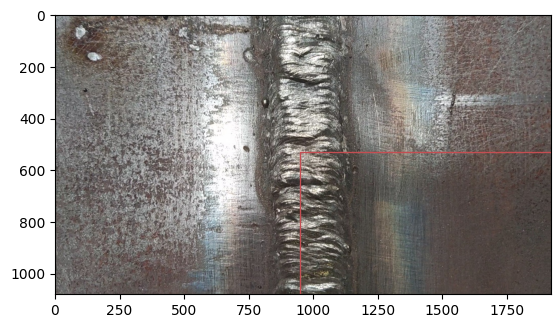

In [47]:
import matplotlib.pyplot as plt
from matplotlib import patches

image = cv2.imread('images/train/1 (1).jpg')
results = model.predict(source='images/train/1 (1).jpg', conf=0.02)
fig, ax = plt.subplots(figsize=(15,10))

ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

for box in results[0].boxes:
    x, y, w, h = box.xywh[0]
    class_name = box.id

    rect = patches.Rectangle((x, y), w, h, linewidth=1,
    edgecolor='r', facecolor='none')

    ax.add_patch(rect)

    ax.text(x, y, class_name, fontsize=12, color='r')

plt.show()